In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('data/data.csv')
df.head(5)

,sno,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [6]:
df.shape

(303, 15)

In [7]:
df['gender']=pd.factorize(df['gender'])[0]
df.isna().sum()

sno         0
age         0
gender      0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
cleaned_df=df.dropna()
cleaned_df.shape[0]

293

In [9]:
x = cleaned_df.drop("target", axis=1)
y = cleaned_df["target"]

np.random.seed(42)

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
from sklearn.model_selection import RandomizedSearchCV

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train, y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.615848211066026}

In [11]:
rs_log_reg.score(x_test, y_test)

0.9830508474576272

In [12]:
x_test.iloc[0]

sno          87.0
age          46.0
gender        0.0
cp            1.0
trestbps    101.0
chol        197.0
fbs           1.0
restecg       1.0
thalach     156.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          3.0
Name: 87, dtype: float64

In [13]:
testrecdf = pd.DataFrame([x_test.iloc[0]])

In [15]:
testrecdf

,sno,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,87.0,46.0,0.0,1.0,101.0,197.0,1.0,1.0,156.0,0.0,0.0,2.0,0.0,3.0


In [14]:
rs_log_reg.predict(testrecdf)

array(['yes'], dtype=object)

In [15]:
!pip install shap


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [25]:
import shap

shap.initjs()
explainer = shap.KernelExplainer(rs_log_reg.predict_proba, x_train)
shap_values = explainer.shap_values(x_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


  0%|          | 0/59 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site

In [27]:
df['target'].value_counts()

target
yes    165
no     138
Name: count, dtype: int64

In [28]:
df['target'].unique()

array(['yes', 'no'], dtype=object)

/var/tmp/ipykernel_35832/1542652003.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[...,1], x_test)


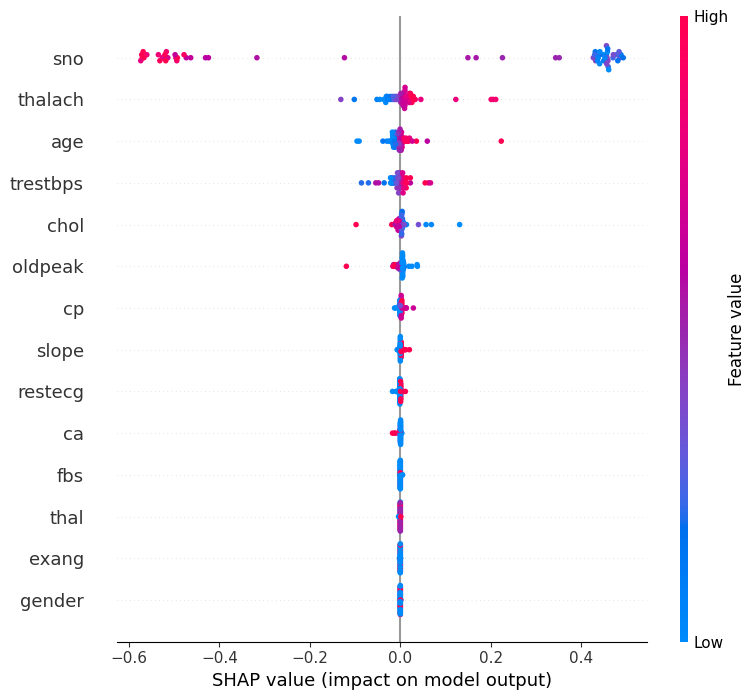

In [29]:
shap.summary_plot(shap_values[...,1], x_test)

In [16]:
!pip install fairlearn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [ ]:
# rs_log_reg.predict(x_test.[0])

In [17]:
df.shape
X = cleaned_df.copy()
X.columns


Index(['sno', 'age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
X.columns

Index(['sno', 'age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
X.drop(columns=["target"], inplace=True)
y = df.target
X_ohe = pd.get_dummies(X)
age_fet = X['age']
age_fet.value_counts()

age
58    19
54    16
57    15
59    13
52    12
51    11
56    11
44    11
60    11
41    10
62    10
67     9
63     9
64     9
65     8
55     8
45     8
53     8
43     8
61     8
42     8
46     7
66     7
50     6
48     6
47     5
49     4
39     4
68     4
70     4
35     4
71     3
38     3
69     3
40     3
37     2
34     2
29     1
76     1
74     1
77     1
Name: count, dtype: int64

In [20]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [32]:
np.random.seed(42)  # set seed for consistent results
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X_ohe, y, age_fet, random_state=123)




log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rs_log_reg1 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)




# rs_log_reg1.fit(X_train, y_train)
# rs_log_reg1.best_params_

ValueError: Found input variables with inconsistent numbers of samples: [293, 303, 293]